In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("avocado.csv")


In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Data Report

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
print(f"Data has {df.shape[0]} rows and{df.shape[1]} columns")

Data has 18249 rows and14 columns


In [7]:
numCol=[]
catCol=[]

for col in df.columns:
    if df[col].dtype=='O':
        catCol.append(col)
    else:
            numCol.append(col)

In [8]:
print("List of categorical columns:",catCol)
print("List of numerical columns:",numCol)

List of categorical columns: ['Date', 'type', 'region']
List of numerical columns: ['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


# Descriptive Statistics

In [9]:
df.describe(include='all')

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,NaN,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,NaN,2017-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Tampa
freq,NaN,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,24.232232,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,15.481045,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,0.000000,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,10.000000,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,24.000000,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,38.000000,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


In [10]:
df[numCol].describe

<bound method NDFrame.describe of        Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0               0          1.33      64236.62  1036.74   54454.85   48.16   
1               1          1.35      54876.98   674.28   44638.81   58.33   
2               2          0.93     118220.22   794.70  109149.67  130.50   
3               3          1.08      78992.15  1132.00   71976.41   72.58   
4               4          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244           7          1.63      17074.83  2046.96    1529.20    0.00   
18245           8          1.71      13888.04  1191.70    3431.50    0.00   
18246           9          1.87      13766.76  1191.92    2452.79  727.94   
18247          10          1.93      16205.22  1527.63    2981.04  727.01   
18248          11          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags

In [11]:
df[catCol].describe().T

,count,unique,top,freq
Date,18249,169,2017-04-09,108
type,18249,2,conventional,9126
region,18249,54,Tampa,338


# missing Value Analysis

In [12]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No missing Values in Datasets

In [13]:
df.isna().sum()/df.shape[0]*100

Unnamed: 0      0.0
Date            0.0
AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
type            0.0
year            0.0
region          0.0
dtype: float64

In [14]:
df[df.isna().sum(axis=1)>1]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


No missing values found im this datasets.

<AxesSubplot:>

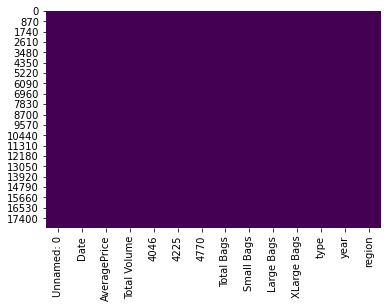

In [15]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

# Check duplicate,repeated and unknown values

In [16]:
df[df.duplicated()]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


No duplicate or repeated or unknown values in datasets 

In [17]:
for i in catCol:
    print(i,"---%Null", (df[i].shape[0]-df[i].notnull().sum()) / df[i].shape[0]*100)
    print(df[i].value_counts())
    print("\n")

Date ---%Null 0.0
2017-04-09    108
2015-12-13    108
2017-01-22    108
2016-02-07    108
2016-04-03    108
             ... 
2016-01-24    108
2017-07-02    108
2017-06-25    107
2017-06-18    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


type ---%Null 0.0
conventional    9126
organic         9123
Name: type, dtype: int64


region ---%Null 0.0
Tampa                  338
GreatLakes             338
NewOrleansMobile       338
Boise                  338
NewYork                338
Denver                 338
MiamiFtLauderdale      338
Columbus               338
Chicago                338
BuffaloRochester       338
Roanoke                338
LosAngeles             338
Albany                 338
SouthCarolina          338
Syracuse               338
SanFrancisco           338
Spokane                338
BaltimoreWashington    338
Southeast              338
PhoenixTucson          338
Detroit                338
Houston                338
Pittsburgh             338
Sacramento      

In [18]:
for i in numCol:
    print(i,"---%Null", (df[i].shape[0]-df[i].notnull().sum()) / df[i].shape[0]*100)
    print(df[i].value_counts())
    print("\n")

Unnamed: 0 ---%Null 0.0
0     432
3     432
11    432
10    432
9     432
8     432
6     432
5     432
4     432
7     432
2     432
1     432
34    324
28    324
41    324
48    324
26    324
42    324
32    324
27    324
43    324
12    324
44    324
13    324
29    324
45    324
14    324
30    324
46    324
15    324
31    324
25    324
40    324
50    324
37    324
18    324
19    324
35    324
20    324
36    324
49    324
24    324
21    324
33    324
22    324
38    324
16    324
23    324
39    324
17    324
47    324
51    322
52    107
Name: Unnamed: 0, dtype: int64


AveragePrice ---%Null 0.0
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
2.91      1
2.68      1
3.04      1
3.17      1
3.03      1
Name: AveragePrice, Length: 259, dtype: int64


Total Volume ---%Null 0.0
3713.49      2
9465.99      2
569349.05    2
2038.99      2
3529.44      2
            ..
4356.15      1
243012.20    1
25937.71     1
331077.90    1
69191.72     1
Name: Total Volu

No Null values present in this data sets.

# Univariate Analysis

In [19]:
for i in catCol:
    print(i)
    print(df[i].nunique())
    print(df[i].value_counts())
    print("\n")

Date
169
2017-04-09    108
2015-12-13    108
2017-01-22    108
2016-02-07    108
2016-04-03    108
             ... 
2016-01-24    108
2017-07-02    108
2017-06-25    107
2017-06-18    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


type
2
conventional    9126
organic         9123
Name: type, dtype: int64


region
54
Tampa                  338
GreatLakes             338
NewOrleansMobile       338
Boise                  338
NewYork                338
Denver                 338
MiamiFtLauderdale      338
Columbus               338
Chicago                338
BuffaloRochester       338
Roanoke                338
LosAngeles             338
Albany                 338
SouthCarolina          338
Syracuse               338
SanFrancisco           338
Spokane                338
BaltimoreWashington    338
Southeast              338
PhoenixTucson          338
Detroit                338
Houston                338
Pittsburgh             338
Sacramento             338
TotalUS            

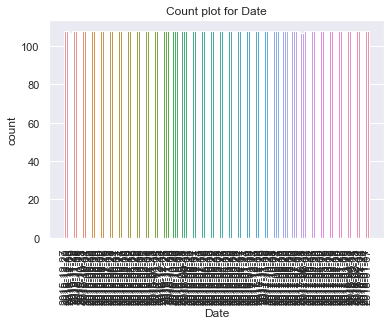

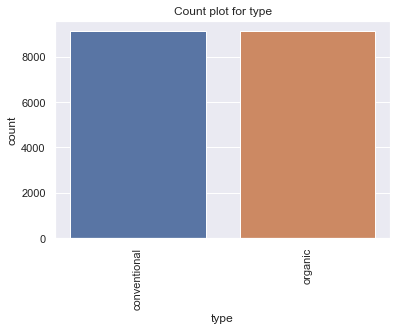

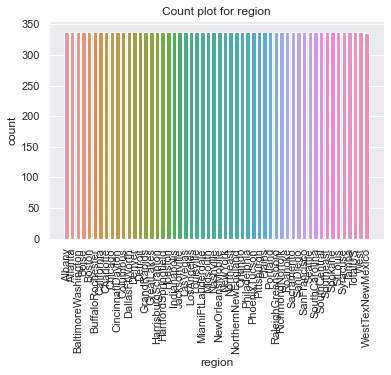

In [20]:
for i in catCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.title(f"Count plot for {i}")
    plt.plot()
    plt.show()

<Figure size 432x288 with 0 Axes>

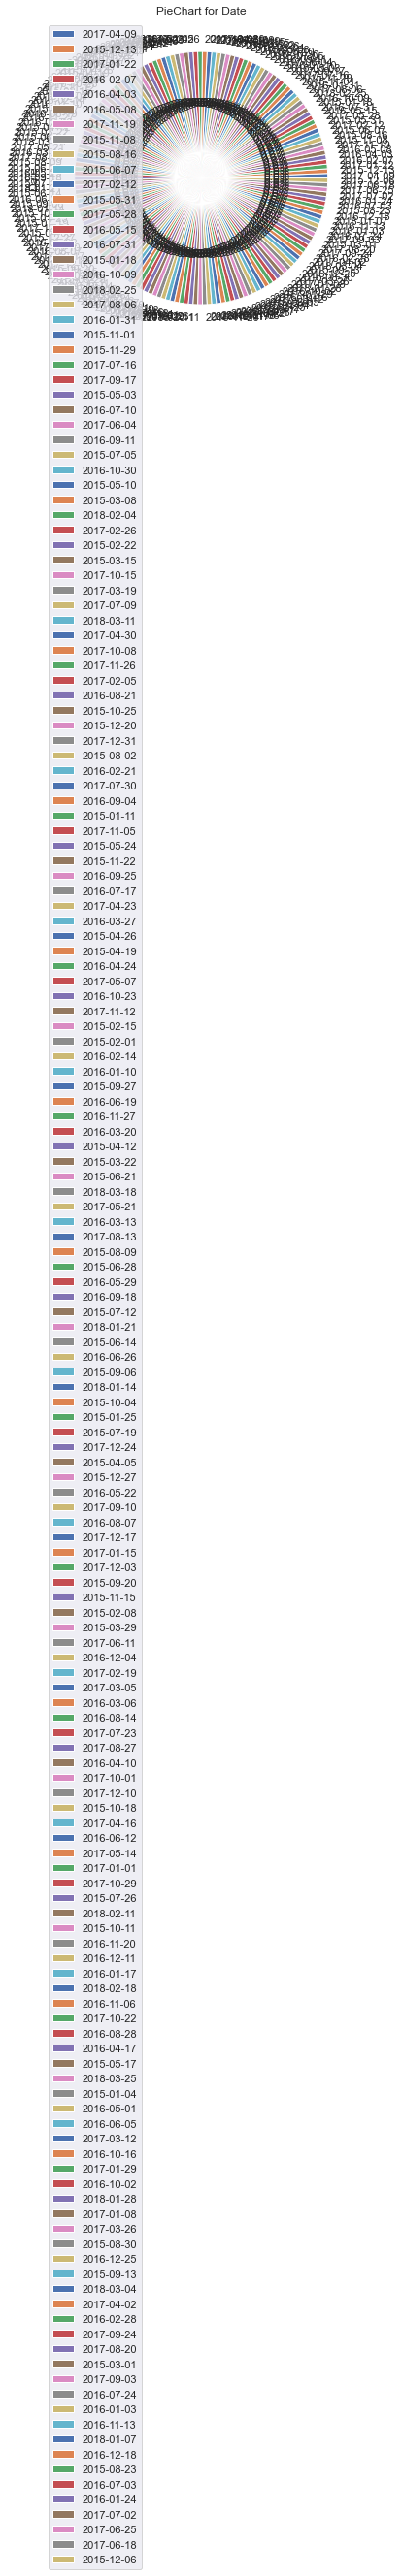

<Figure size 432x288 with 0 Axes>

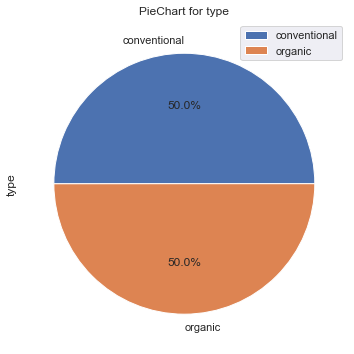

<Figure size 432x288 with 0 Axes>

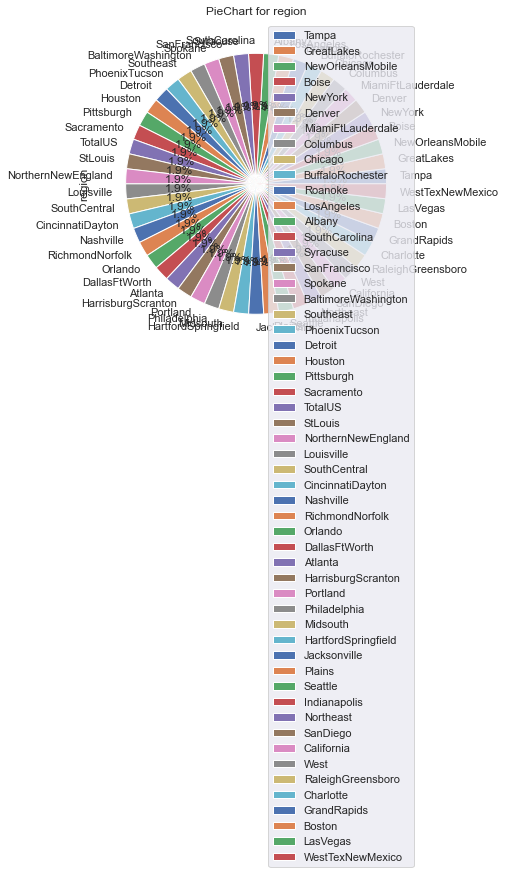

In [21]:
for i in catCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    countsDF= pd.DataFrame(df[i].value_counts())
    plot= countsDF.plot.pie(subplots=True,autopct="%.1f%%",figsize=(11,6))
    plt.title(f"PieChart for {i}")
    plt.plot()
    plt.show()

The above Pie charts shows the data of avocado of various dates,types of conventional & regions.It is difficult to read the data from pie charts so now we plot the Boxplot for various data.

Unnamed: 0


<Figure size 432x288 with 0 Axes>

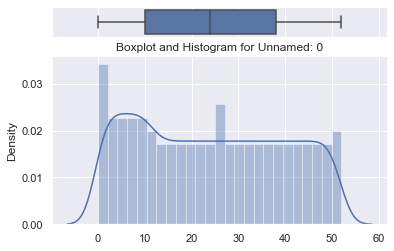

AveragePrice


<Figure size 432x288 with 0 Axes>

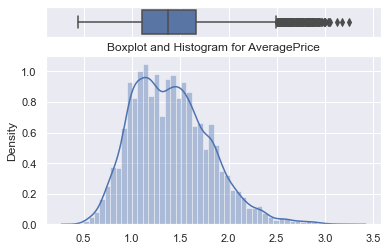

Total Volume


<Figure size 432x288 with 0 Axes>

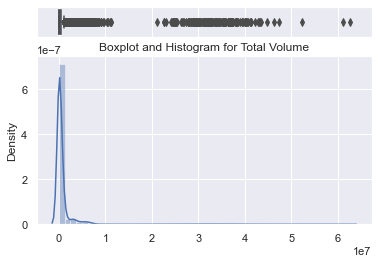

4046


<Figure size 432x288 with 0 Axes>

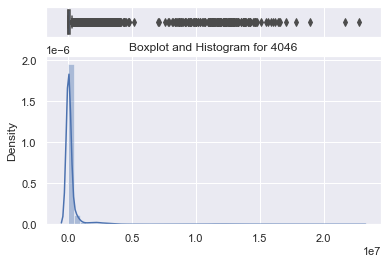

4225


<Figure size 432x288 with 0 Axes>

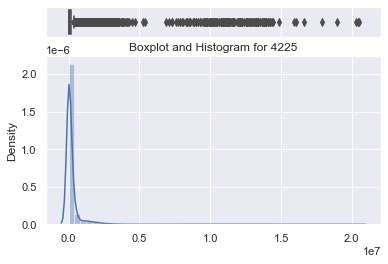

4770


<Figure size 432x288 with 0 Axes>

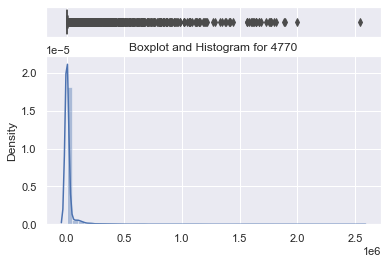

Total Bags


<Figure size 432x288 with 0 Axes>

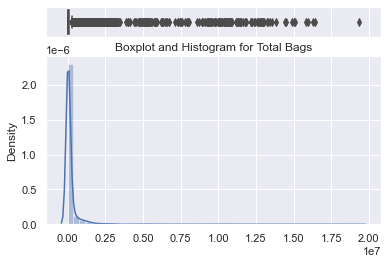

Small Bags


<Figure size 432x288 with 0 Axes>

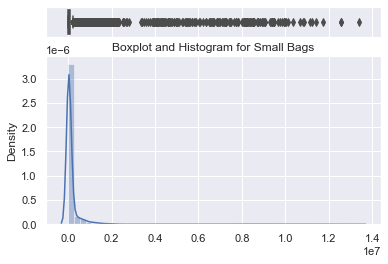

Large Bags


<Figure size 432x288 with 0 Axes>

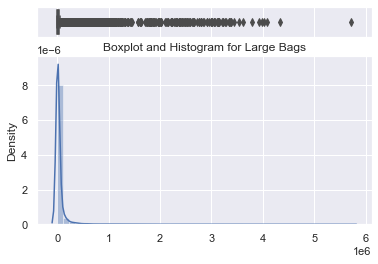

XLarge Bags


<Figure size 432x288 with 0 Axes>

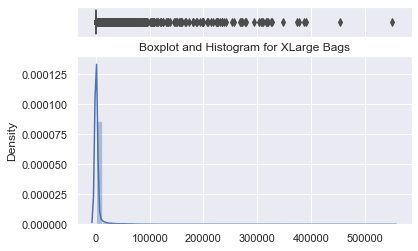

year


<Figure size 432x288 with 0 Axes>

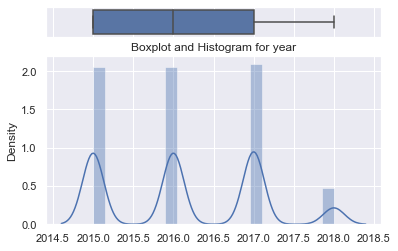

In [22]:
for i in numCol:
    print(i)
    plt.figure()
    sns.set_theme(style="darkgrid")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15,.85)})
    sns.boxplot(x = df[i],ax=ax_box)
    #sns.histplot (data=df, x=i, ax=ax_hist)
    sns.distplot(x= df[i],ax=ax_hist)
    ax_box.set(xlabel='')
    plt.plot()
    plt.title(f"Boxplot and Histogram for {i}")
    plt.show()

The boxplot of various data with the Probability Density 

In [23]:
pd.DataFrame(df.skew(axis=0,skipna=True))

,0
Unnamed: 0,0.108334
AveragePrice,0.580303
Total Volume,9.007687
4046,8.648220
4225,8.942466
4770,10.159396
Total Bags,9.756072
Small Bags,9.540660
Large Bags,9.796455
XLarge Bags,13.139751


# Multivariate Analysis

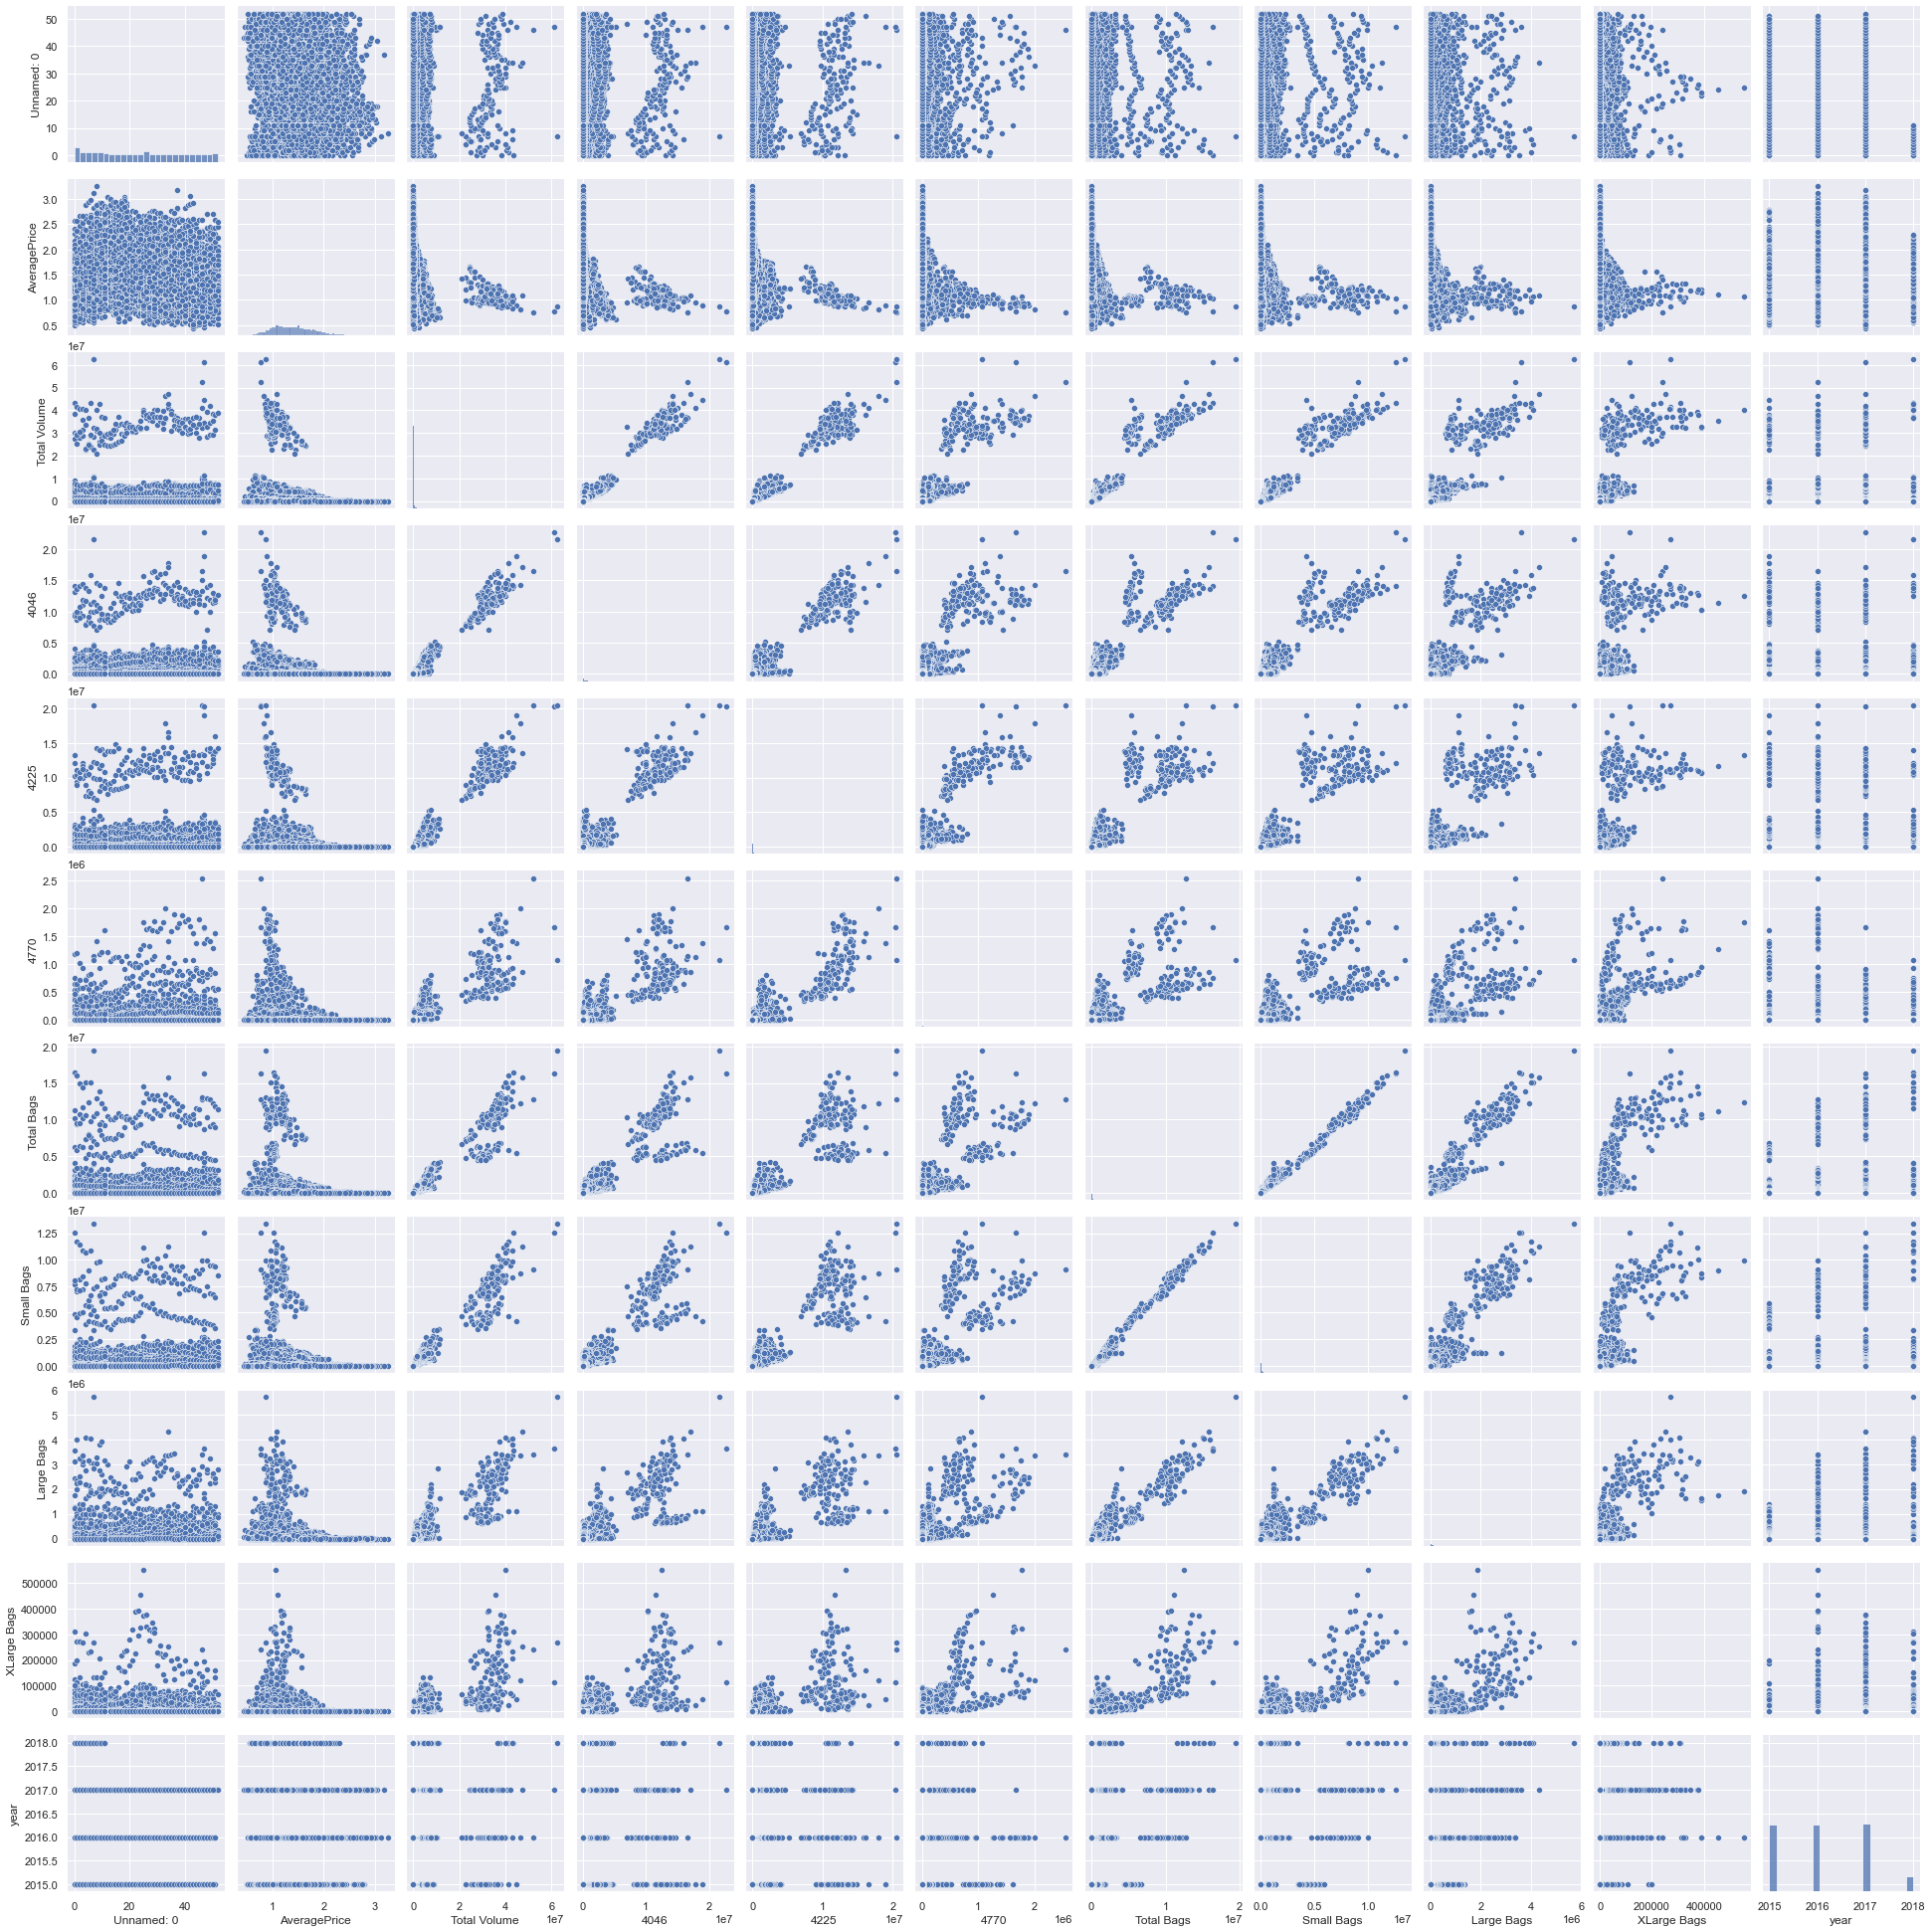

In [24]:
sns.pairplot(df)
plt.plot()
plt.show()

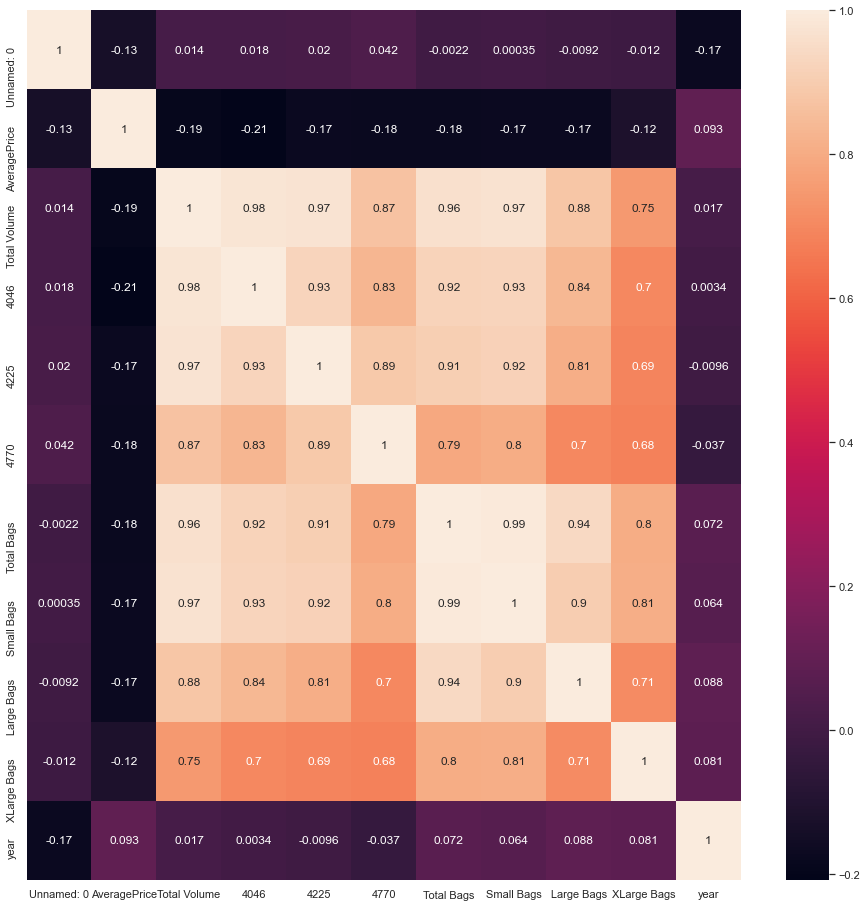

In [25]:
plt.figure(figsize= (16,16))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Data Scaling

In [26]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [27]:
df_num=pd.DataFrame(imp_median.fit_transform(df[numCol]), columns=numCol)
df_cat=pd.DataFrame(imp_mode.fit_transform(df[catCol]),columns=catCol)

In [28]:
df=pd.concat([df_num,df_cat],axis=1)

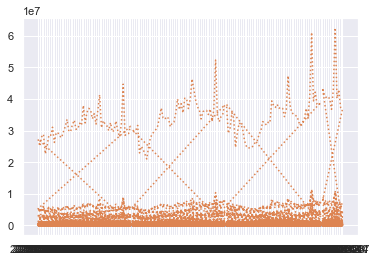

In [30]:
plt.plot(df["Date"],df["AveragePrice"],label="Line1",linestyle="-.")
plt.plot(df["Date"],df["Total Volume"],label="Line2",linestyle=":")
plt.plot();

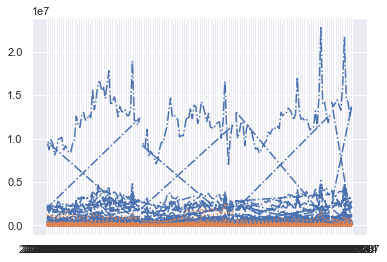

In [31]:
plt.plot(df["Date"],df["4046"],label="Line1",linestyle="-.")
plt.plot(df["Date"],df["4770"],label="Line2",linestyle=":")
plt.plot();

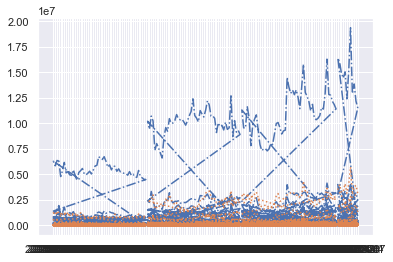

In [32]:
plt.plot(df["Date"],df["Total Bags"],label="Line1",linestyle="-.")
plt.plot(df["Date"],df["Large Bags"],label="Line2",linestyle=":")
plt.plot();

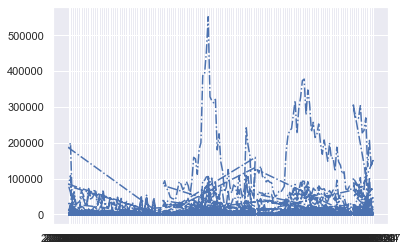

In [33]:
plt.plot(df["Date"],df["XLarge Bags"],label="Line1",linestyle="-.")
plt.plot();

# MinMax Sacaling/ Normalization

In [34]:
from sklearn.preprocessing import MinMaxScaler
MinMaxscaler=MinMaxScaler()
MinMax=MinMaxscaler.fit_transform(df[numCol])
print(MinMax)

[[0.00000000e+00 3.16725979e-01 1.02634162e-03 ... 1.63050227e-05
  0.00000000e+00 0.00000000e+00]
 [1.92307692e-02 3.23843416e-01 8.76600710e-04 ... 1.70463985e-05
  0.00000000e+00 0.00000000e+00]
 [3.84615385e-02 1.74377224e-01 1.89000237e-03 ... 1.80343168e-05
  0.00000000e+00 0.00000000e+00]
 ...
 [1.73076923e-01 5.08896797e-01 2.18895720e-04 ... 7.39802156e-06
  0.00000000e+00 1.00000000e+00]
 [1.92307692e-01 5.30249110e-01 2.57907608e-04 ... 8.74263951e-06
  0.00000000e+00 1.00000000e+00]
 [2.11538462e-01 4.19928826e-01 2.78455540e-04 ... 4.54792107e-06
  0.00000000e+00 1.00000000e+00]]


In [35]:
df[numCol]

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0
1,1.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0
2,2.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0
3,3.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0
4,4.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...
18244,7.0,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018.0
18245,8.0,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018.0
18246,9.0,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018.0
18247,10.0,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018.0


In [36]:
minMaxDF=pd.DataFrame(MinMax,columns=numCol)
minMaxDF

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0.000000,0.316726,0.001026,0.000046,0.002660,0.000019,0.000449,0.000643,0.000016,0.0,0.0
1,0.019231,0.323843,0.000877,0.000030,0.002181,0.000023,0.000491,0.000703,0.000017,0.0,0.0
2,0.038462,0.174377,0.001890,0.000035,0.005332,0.000051,0.000420,0.000601,0.000018,0.0,0.0
3,0.057692,0.227758,0.001262,0.000050,0.003516,0.000029,0.000300,0.000424,0.000023,0.0,0.0
4,0.076923,0.298932,0.000815,0.000041,0.002142,0.000030,0.000319,0.000447,0.000035,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18244,0.134615,0.423488,0.000272,0.000090,0.000075,0.000000,0.000697,0.000976,0.000076,0.0,1.0
18245,0.153846,0.451957,0.000221,0.000052,0.000168,0.000000,0.000478,0.000668,0.000057,0.0,1.0
18246,0.173077,0.508897,0.000219,0.000052,0.000120,0.000286,0.000485,0.000699,0.000007,0.0,1.0
18247,0.192308,0.530249,0.000258,0.000067,0.000146,0.000286,0.000566,0.000816,0.000009,0.0,1.0


Due do Slice the dataset the number of columns is same but the data change.

In [37]:
minMaxDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,0.466004,0.297712,0.0,0.192308,0.461538,0.730769,1.0
AveragePrice,18249.0,0.343765,0.143301,0.0,0.234875,0.330961,0.434164,1.0
Total Volume,18249.0,0.013608,0.055252,0.0,0.000172,0.001717,0.006925,1.0
4046,18249.0,0.012883,0.055620,0.0,0.000038,0.000380,0.004881,1.0
4225,18249.0,0.014418,0.058822,0.0,0.000147,0.001420,0.007338,1.0
4770,18249.0,0.008969,0.042202,0.0,0.000000,0.000073,0.002452,1.0
Total Bags,18249.0,0.012370,0.050908,0.0,0.000263,0.002051,0.005718,1.0
Small Bags,18249.0,0.013612,0.055749,0.0,0.000213,0.001970,0.006226,1.0
Large Bags,18249.0,0.009501,0.042658,0.0,0.000022,0.000463,0.003852,1.0
XLarge Bags,18249.0,0.005631,0.032070,0.0,0.000000,0.000000,0.000240,1.0


In [38]:
df[numCol].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


# Standardization

In [39]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
stdscaled=stdscaler.fit_transform(df[numCol])
print(stdscaled)

[[-1.5653269  -0.18868864 -0.22771641 ... -0.22235202 -0.17557961
  -1.22128204]
 [-1.50073001 -0.13901962 -0.23042664 ... -0.22233464 -0.17557961
  -1.22128204]
 [-1.43613312 -1.18206895 -0.21208462 ... -0.22231148 -0.17557961
  -1.22128204]
 ...
 [-0.98395486  1.15237477 -0.24233073 ... -0.22256082 -0.17557961
   1.97050371]
 [-0.91935797  1.30138182 -0.24162464 ... -0.2225293  -0.17557961
   1.97050371]
 [-0.85476108  0.53151208 -0.24125273 ... -0.22262764 -0.17557961
   1.97050371]]


In [40]:
stdscaledDF= pd.DataFrame(stdscaled,columns=numCol)
stdscaledDF

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,-1.565327,-0.188689,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,-1.221282
1,-1.500730,-0.139020,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,-1.221282
2,-1.436133,-1.182069,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,-1.221282
3,-1.371536,-0.809551,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,-1.221282
4,-1.306939,-0.312861,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,-1.221282
...,...,...,...,...,...,...,...,...,...,...,...
18244,-1.113149,0.556347,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,1.970504
18245,-1.048552,0.755023,-0.242296,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558,1.970504
18246,-0.983955,1.152375,-0.242331,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558,1.970504
18247,-0.919358,1.301382,-0.241625,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558,1.970504


In [41]:
df[numCol]

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0
1,1.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0
2,2.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0
3,3.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0
4,4.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...
18244,7.0,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018.0
18245,8.0,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018.0
18246,9.0,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018.0
18247,10.0,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018.0


In [42]:
stdscaledDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,1.091084e-15,1.000027,-1.565327,-0.919358,-0.015001,0.889355,1.793712
AveragePrice,18249.0,-4.614985e-15,1.000027,-2.398960,-0.759882,-0.089351,0.630850,4.579537
Total Volume,18249.0,8.391160e-17,1.000027,-0.246293,-0.243179,-0.215225,-0.120946,17.853158
4046,18249.0,-6.334550e-16,1.000027,-0.231636,-0.230960,-0.224801,-0.143869,17.748155
4225,18249.0,-4.994878e-16,1.000027,-0.245127,-0.242628,-0.220992,-0.120380,16.755775
4770,18249.0,-8.318726e-15,1.000027,-0.212540,-0.212540,-0.210818,-0.154440,23.483836
Total Bags,18249.0,3.591875e-16,1.000027,-0.242989,-0.237829,-0.202689,-0.130657,19.400930
Small Bags,18249.0,-8.889054e-16,1.000027,-0.244177,-0.240358,-0.208846,-0.132488,17.693827
Large Bags,18249.0,-2.891970e-15,1.000027,-0.222734,-0.222212,-0.211881,-0.132435,23.220099
XLarge Bags,18249.0,-1.525511e-14,1.000027,-0.175580,-0.175580,-0.175580,-0.168091,31.006925


# Outlier Analysis

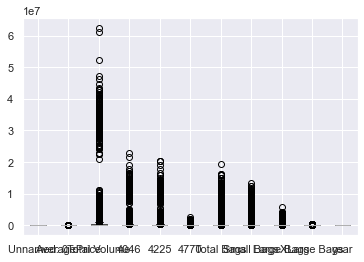

In [43]:
df.boxplot();

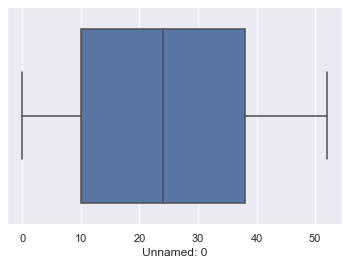

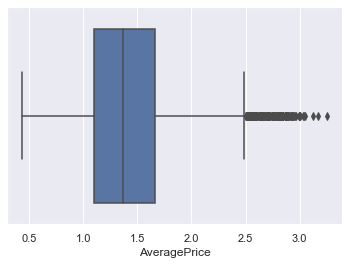

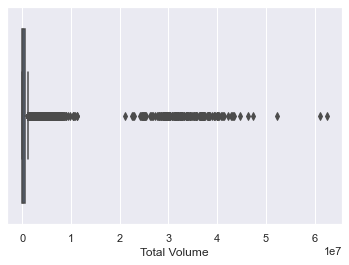

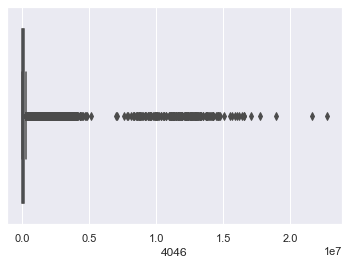

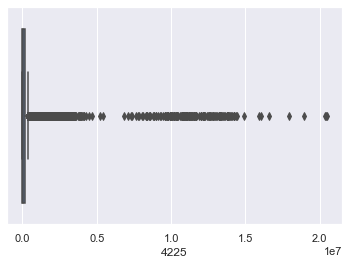

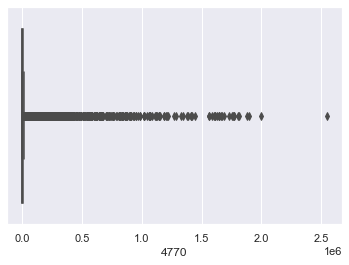

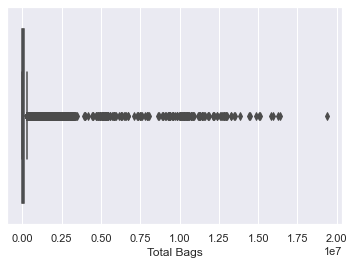

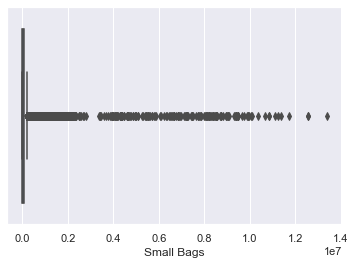

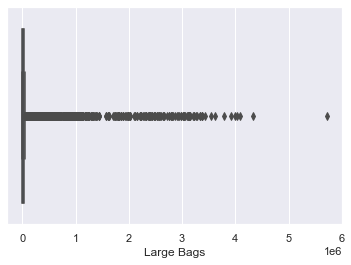

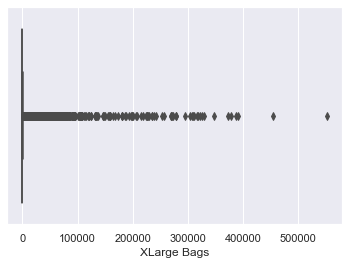

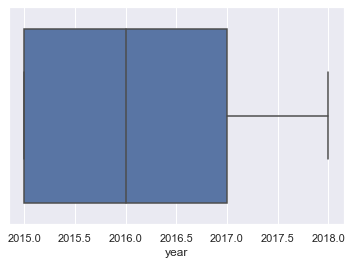

In [44]:
for i in numCol:
    plt.figure()
    sns.boxplot(x=df[i])

This box plot are plot for the range of min,,25%,75% & max.range for various parameters of data sets and its shows that the outliers are present.

In [45]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(((df<(Q1-1.5 * IQR)) | (df > (Q3 +1.5 * IQR ))).sum())

4046            2518
4225            2519
4770            2918
AveragePrice     209
Date               0
Large Bags      2707
Small Bags      2407
Total Bags      2533
Total Volume    2297
Unnamed: 0         0
XLarge Bags     4014
region             0
type               0
year               0
dtype: int64


In [46]:
outNum =[]
for i in numCol:
    q1= df[i].quantile(0.25)
    q3= df[i].quantile(0.75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    outNum.append([i,q1,q3,iqr,lower_limit,upper_limit])
    
    df[i] = np.where(df[i]> upper_limit,upper_limit,
                 np.where(df[i]< lower_limit,lower_limit,
                         df[i]))
    

In [47]:
pd.DataFrame(outNum,columns=["variableName","Q1","Q3","IQR","lowe_limit","upper_limit"])

,variableName,Q1,Q3,IQR,lowe_limit,upper_limit
0,Unnamed: 0,10.00,38.00,28.00,-32.000,80.000
1,AveragePrice,1.10,1.66,0.56,0.260,2.500
2,Total Volume,10838.58,432962.29,422123.71,-622346.985,1066147.855
3,4046,854.07,111020.20,110166.13,-164395.125,276269.395
4,4225,3008.78,150206.86,147198.08,-217788.340,371003.980
5,4770,0.00,6243.42,6243.42,-9365.130,15608.550
6,Total Bags,5088.64,110783.37,105694.73,-153453.455,269325.465
7,Small Bags,2849.42,83337.67,80488.25,-117882.955,204070.045
8,Large Bags,127.47,22029.25,21901.78,-32725.200,54881.920
9,XLarge Bags,0.00,132.50,132.50,-198.750,331.250


As we see the outliers present in lower_limit shows that in Unnamed 0,Total volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags. 

# Heatmap of Dataset

<AxesSubplot:>

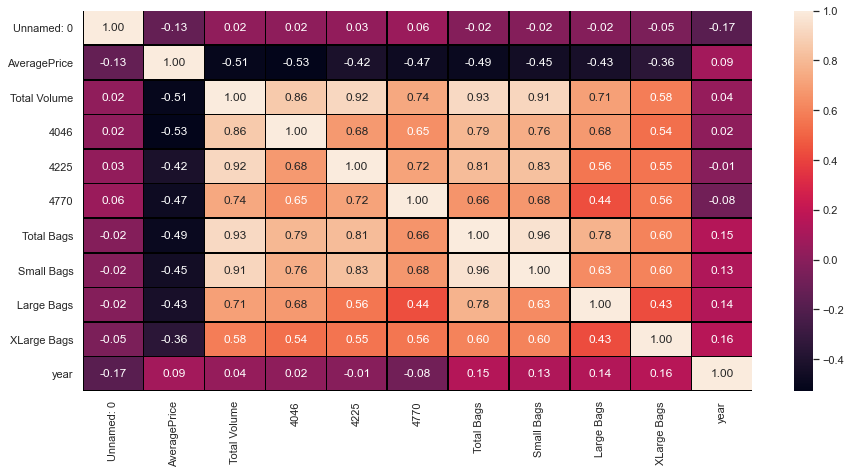

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt='.2f')

In [84]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,1.403668,2.889859e+05,69525.206350,98713.852159,3921.430544,77943.663114,57475.744762,14324.312070,82.932110,2016.147899
std,15.481045,0.395427,3.701947e+05,99244.901205,133134.946501,5995.411078,93026.265810,69703.476607,20224.173615,138.106393,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,854.070000,3008.780000,0.000000,5088.640000,2849.420000,127.470000,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8645.300000,29061.020000,184.990000,39743.830000,26362.820000,2647.710000,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,111020.200000,150206.860000,6243.420000,110783.370000,83337.670000,22029.250000,132.500000,2017.000000
max,52.000000,2.500000,1.066148e+06,276269.395000,371003.980000,15608.550000,269325.465000,204070.045000,54881.920000,331.250000,2018.000000


In [85]:
df.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of        Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0             0.0          1.33      64236.62  1036.74   54454.85   48.16   
1             1.0          1.35      54876.98   674.28   44638.81   58.33   
2             2.0          0.93     118220.22   794.70  109149.67  130.50   
3             3.0          1.08      78992.15  1132.00   71976.41   72.58   
4             4.0          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244         7.0          1.63      17074.83  2046.96    1529.20    0.00   
18245         8.0          1.71      13888.04  1191.70    3431.50    0.00   
18246         9.0          1.87      13766.76  1191.92    2452.79  727.94   
18247        10.0          1.93      16205.22  1527.63    2981.04  727.01   
18248        11.0          1.62      17489.58  2894.77    2356.13  224.53   

       Total

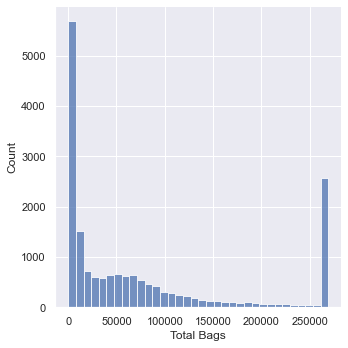

In [86]:
sns.displot(df["Total Bags"])s

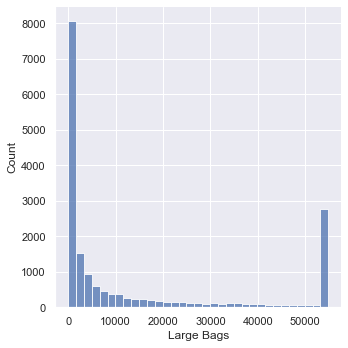

In [89]:
sns.displot(df["Large Bags"])

# Dropping columns

In [96]:
df=df.drop('Date',axis=1)
df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type
0,0.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,conventional
1,1.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,conventional
2,2.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,conventional
3,3.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,conventional
4,4.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,conventional
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7.0,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018.0,organic
18245,8.0,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018.0,organic
18246,9.0,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018.0,organic
18247,10.0,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018.0,organic


In [97]:
df=df.drop('type',axis=1)
df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0
1,1.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0
2,2.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0
3,3.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0
4,4.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...
18244,7.0,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018.0
18245,8.0,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018.0
18246,9.0,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018.0
18247,10.0,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018.0


In [98]:
df=df.drop('year',axis=1)
df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,2.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,3.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,4.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0
...,...,...,...,...,...,...,...,...,...,...
18244,7.0,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0
18245,8.0,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0
18246,9.0,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0
18247,10.0,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0


In [99]:
df=df.drop('XLarge Bags',axis=1)
df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags
0,0.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25
1,1.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49
2,2.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14
3,3.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76
4,4.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69
...,...,...,...,...,...,...,...,...,...
18244,7.0,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85
18245,8.0,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80
18246,9.0,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31
18247,10.0,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00


In [100]:
df.shape

(18249, 9)

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [101]:
X=df.drop('Large Bags',axis=1)
Y=df['Large Bags']

In [102]:
Y.value_counts()

54881.92    2707
0.00        2370
3.33         187
6.67          78
10.00         47
            ... 
19224.32       1
90.42          1
21393.29       1
14.79          1
3210.85        1
Name: Large Bags, Length: 12376, dtype: int64

In [104]:
X

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags
0,0.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62
1,1.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07
2,2.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21
3,3.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40
4,4.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26
...,...,...,...,...,...,...,...,...
18244,7.0,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82
18245,8.0,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04
18246,9.0,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80
18247,10.0,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54


In [105]:
Y

0         93.25
1         97.49
2        103.14
3        133.76
4        197.69
          ...  
18244    431.85
18245    324.80
18246     42.31
18247     50.00
18248     26.01
Name: Large Bags, Length: 18249, dtype: float64

# Label Binarization

In [106]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0)

In [107]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: Large Bags, Length: 18249, dtype: int64

In [108]:
X

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags
0,0.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62
1,1.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07
2,2.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21
3,3.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40
4,4.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26
...,...,...,...,...,...,...,...,...
18244,7.0,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82
18245,8.0,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04
18246,9.0,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80
18247,10.0,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54


In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags
0,-1.565327,-0.186305,-0.607128,-0.690114,-0.332446,-0.646057,-0.744399,-0.701162
1,-1.500730,-0.135726,-0.632411,-0.693767,-0.406178,-0.644361,-0.735706,-0.689621
2,-1.436133,-1.197899,-0.461299,-0.692553,0.078387,-0.632323,-0.750328,-0.709217
3,-1.371536,-0.818551,-0.567268,-0.689155,-0.200835,-0.641984,-0.775421,-0.743145
4,-1.306939,-0.312755,-0.642778,-0.691074,-0.412191,-0.641450,-0.771413,-0.738713
...,...,...,...,...,...,...,...,...
18244,-1.113149,0.572389,-0.734528,-0.679935,-0.729991,-0.654090,-0.692780,-0.637130
18245,-1.048552,0.774708,-0.743137,-0.688553,-0.715702,-0.654090,-0.738294,-0.696336
18246,-0.983955,1.179345,-0.743465,-0.688551,-0.723054,-0.532670,-0.736904,-0.690428
18247,-0.919358,1.331084,-0.736878,-0.685168,-0.719086,-0.532826,-0.719968,-0.667936


# Creating the training and testing datasets

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

# Machine Learning Model for Classification and Evaluation Metrics

In [111]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 


In [112]:
#Classification of model function
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=21)
#Training the model
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    acc_score=(accuracy_score(Y_test,pred))*100
    print("Accuracy Score:",acc_score)
    class_report=classification_report(Y_test,pred)
    print("\nClassification Report:\n",class_report)
    cv_score=(cross_val_score(model,X,Y,cv=5).mean())*100
    print("Cross Validation Score:",cv_score)
    result=acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is",result)

In [113]:
model=LogisticRegression()
classify(model,X,Y)

Accuracy Score: 84.52054794520548

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.02      0.04       575
           1       0.85      1.00      0.92      3075

    accuracy                           0.85      3650
   macro avg       0.83      0.51      0.48      3650
weighted avg       0.84      0.85      0.78      3650

Cross Validation Score: 83.22085465336724

Accuracy Score - Cross Validation Score is 1.2996932918382385


As Logistic Regression the Accuracy score of model is 84.52 and the cross validation score is 1.29

In [114]:
model=SVC(C=1.0,kernel='rbf',gamma='auto',random_state=42)
classify(model,X,Y)

Accuracy Score: 84.24657534246576

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       575
           1       0.84      1.00      0.91      3075

    accuracy                           0.84      3650
   macro avg       0.42      0.50      0.46      3650
weighted avg       0.71      0.84      0.77      3650

Cross Validation Score: 81.13850670290603

Accuracy Score - Cross Validation Score is 3.1080686395597326


with support Vector Classifier the accuracy score of model is 84.24 and the cross validation score is 3.10

In [115]:
model=DecisionTreeClassifier(random_state=21,max_depth=15)
classify(model,X,Y)

Accuracy Score: 90.3013698630137

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69       575
           1       0.94      0.94      0.94      3075

    accuracy                           0.90      3650
   macro avg       0.82      0.82      0.82      3650
weighted avg       0.90      0.90      0.90      3650

Cross Validation Score: 82.7437413890839

Accuracy Score - Cross Validation Score is 7.55762847392981


with Decision Tree Classifier the accuracy score of model is 90.30 and cross validation score is 7.55

In [116]:
model=RandomForestClassifier(max_depth=15,random_state=111)
classify(model,X,Y)

Accuracy Score: 92.84931506849315

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.68      0.75       575
           1       0.94      0.98      0.96      3075

    accuracy                           0.93      3650
   macro avg       0.89      0.83      0.85      3650
weighted avg       0.93      0.93      0.93      3650

Cross Validation Score: 83.41254537741621

Accuracy Score - Cross Validation Score is 9.436769691076947


with random forest classifier the accuracy score of model is 92.84 and cross validation score is 9.43

In [117]:
model=KNeighborsClassifier(n_neighbors=15)
classify(model,X,Y)

Accuracy Score: 85.06849315068493

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.28      0.37       575
           1       0.88      0.96      0.92      3075

    accuracy                           0.85      3650
   macro avg       0.71      0.62      0.64      3650
weighted avg       0.83      0.85      0.83      3650

Cross Validation Score: 79.20389673282602

Accuracy Score - Cross Validation Score is 5.864596417858905


with KNeighbors classifier the accuracy score of model is 85.06 and cross validation score is 5.86

In [118]:
model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 93.20547945205479

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.71      0.77       575
           1       0.95      0.97      0.96      3075

    accuracy                           0.93      3650
   macro avg       0.89      0.84      0.86      3650
weighted avg       0.93      0.93      0.93      3650

Cross Validation Score: 82.83716687251527

Accuracy Score - Cross Validation Score is 10.36831257953952


with Extra Tree classifier the accuracy score of model is 93.20 and cross validation score is 82.83

# AUC ROC Curve

In [119]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 84.24657534246576


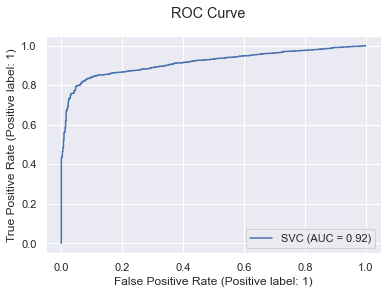

In [120]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

I have generated the ROC Curve for my final model and it shows the Area under the ROC curve score for my final model to be of 92%.The curve shows the True Positive Rate VS False Positive Rate at different classification thresholds.